# Part 1

In [1]:
using PyPlot
using Random
import Statistics.mean
import LinearAlgebra.dot
import LinearAlgebra.norm
import LinearAlgebra.I
import Printf.@printf

Random.seed!(4242);

Objective function is
$$ f(w) = \frac{1}{2} w^2 $$
so the gradient is
$$ f(w) = w $$

In [2]:
x = randn(10); y = sqrt(0.95) * x + sqrt(0.05) * randn(10);

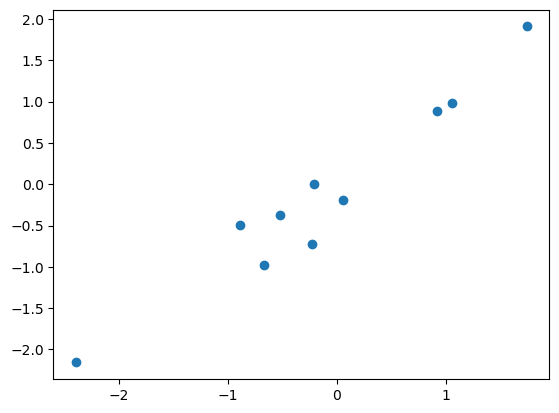

PyObject <matplotlib.collections.PathCollection object at 0x2beb76b90>

In [3]:
scatter(x, y)

training error: 0.07


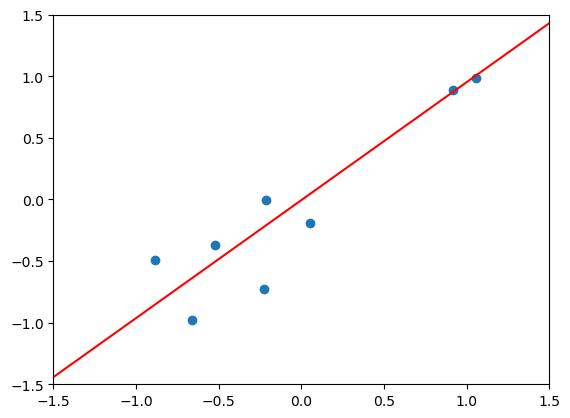

In [4]:
# fit with linear regression

f = [x ones(10)];
w = y' / f';

xplot = collect(-1.5:0.1:1.5);
fplot = [xplot ones(length(xplot))]

plot(xplot, fplot * w'; color="red");
scatter(x, y);

xlim([-1.5, 1.5]);
ylim([-1.5, 1.5]);

training_error = round(mean((y - f * w').^2); digits=3)
println("training error: $(training_error)")

training error: 0.0


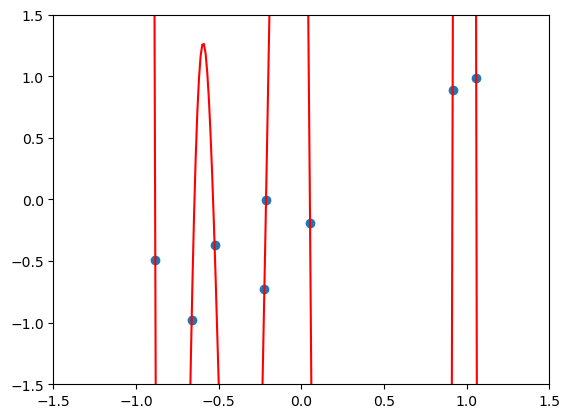

In [5]:
# fit with degree 10 polynomial

f = hcat([x.^k for k = 0:10]...);
w = y' / f';

xplot = collect(-1.5:0.01:1.5);
fplot = hcat([xplot.^k for k = 0:10]...)

plot(xplot, fplot * w'; color="red");
scatter(x, y);

xlim([-1.5, 1.5]);
ylim([-1.5, 1.5]);

training_error = round(mean((y - f * w').^2); digits=3)
println("training error: $(training_error)")

In [6]:
# make a test set and a validation set
test_x = randn(20); test_y = sqrt(0.9) * test_x + sqrt(0.1) * randn(20);
validation_x = randn(20); validation_y = sqrt(0.9) * validation_x + sqrt(0.1) * randn(20);

training error: 0.07
test error: 0.096


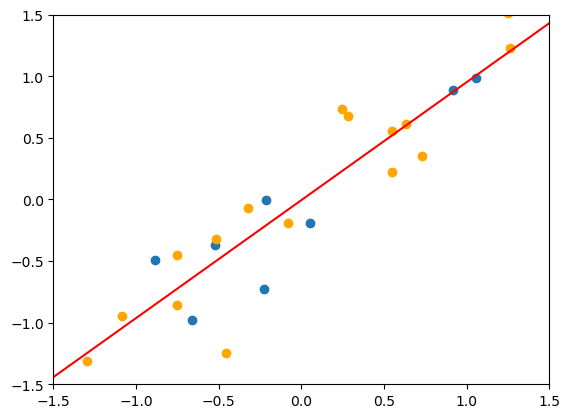

In [7]:
# fit with linear regression

f = [x ones(10)];
w = y' / f';

xplot = collect(-1.5:0.1:1.5);
fplot = [xplot ones(length(xplot))]

plot(xplot, fplot * w'; color="red");
scatter(x, y);
scatter(test_x, test_y; color="orange");

xlim([-1.5, 1.5]);
ylim([-1.5, 1.5]);

training_error = round(mean((y - f * w').^2); digits=3)
println("training error: $(training_error)")

test_f = [test_x ones(length(test_x))];

test_error = round(mean((test_y - test_f * w').^2); digits=3)
println("test error: $(test_error)")

training error: 0.0
test error: 16989667309644.136719

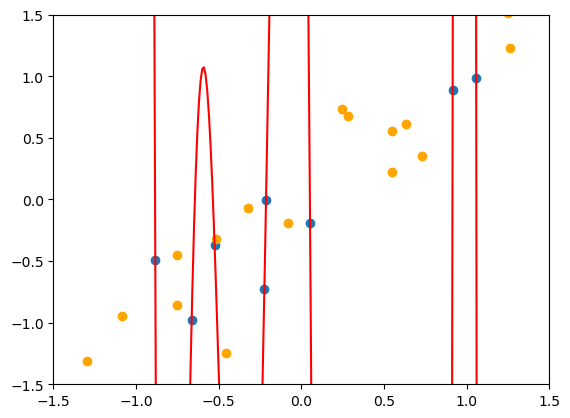

In [8]:
# fit with degree 10 polynomial

f = hcat([x.^k / factorial(k) for k = 0:10]...);
w = y' / f';

xplot = collect(-1.5:0.01:1.5);
fplot = hcat([xplot.^k / factorial(k) for k = 0:10]...)

plot(xplot, fplot * w'; color="red");
scatter(x, y);
scatter(test_x, test_y; color="orange");

xlim([-1.5, 1.5]);
ylim([-1.5, 1.5]);

training_error = round(mean((y - f * w').^2); digits=3)
println("training error: $(training_error)")

test_f = hcat([test_x.^k / factorial(k) for k = 0:10]...)

test_error = round(mean((test_y - test_f * w').^2); digits=3)
@printf("test error: %f", test_error)

---

# Part 2

Suppose that we use regularization such that for a polynomial of the form
$$f_w(x) = \sum_{k = 0}^{10} \frac{w_k x^k}{k!}$$
the loss function is
$$h(w) = \sum_{i=1}^N (f_w(x_i) - y_i)^2 + \sigma^2 \| w \|^2.$$
If $A$ is the matrix such that
$$ A_{i,j} = \frac{x_i^j}{j!} $$
then equivalently
$$h(w) = \left\| \left[\begin{array}{c} A \\ \sigma I \end{array} \right] w - \left[\begin{array}{c} y \\ 0 \end{array} \right] \right\|^2$$
so we can still solve this easily with linear regression.

training error: 0.045
test error: 7.996000

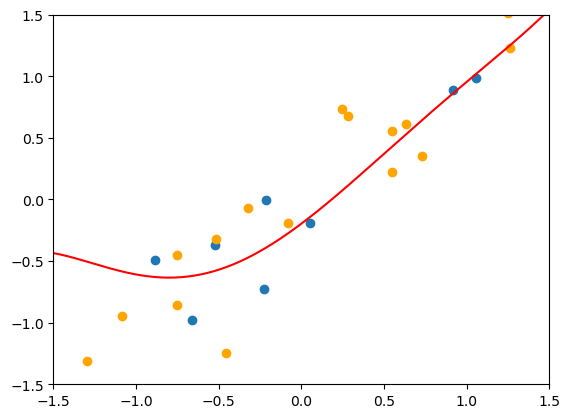

In [9]:
# fit with regularized degree 10 polynomial

sigma = 0.01

f = hcat([x.^k / factorial(k) for k = 0:10]...);
f_reg = vcat(f, sigma * Matrix{Float64}(I, 11, 11))
y_reg = vcat(y, zeros(11))

w = y_reg' / f_reg';

xplot = collect(-1.5:0.01:1.5);
fplot = hcat([xplot.^k / factorial(k) for k = 0:10]...)

plot(xplot, fplot * w'; color="red");
scatter(x, y);
scatter(test_x, test_y; color="orange");

xlim([-1.5, 1.5]);
ylim([-1.5, 1.5]);

training_error = round(mean((y - f * w').^2); digits=3)
println("training error: $(training_error)")

test_f = hcat([test_x.^k / factorial(k) for k = 0:10]...)

test_error = round(mean((test_y - test_f * w').^2); digits=3)
@printf("test error: %f", test_error)

In [10]:
function regularized_fit_error(sigma)  
    test_x = randn(10000); test_y = sqrt(0.9) * test_x + sqrt(0.1) * randn(10000);
    
    f = hcat([x.^k / factorial(k) for k = 0:10]...);
    f_reg = vcat(f, sigma * Matrix{Float64}(I, 11, 11))
    y_reg = vcat(y, zeros(11))

    w = y_reg' / f_reg';

    test_f = hcat([test_x.^k / factorial(k) for k = 0:10]...)
    
    training_error = round(mean((y - f * w').^2); digits=3)
    test_error = round(mean((test_y - test_f * w').^2); digits=3)
    
    return (training_error, test_error)
end

regularized_fit_error (generic function with 1 method)

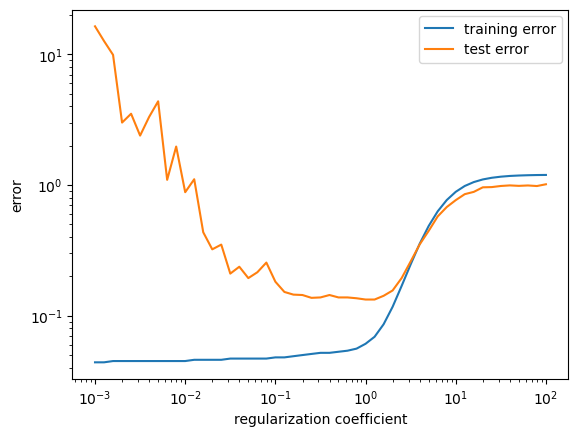

In [11]:
sigmas = 10 .^ (-3:0.1:2);
training_errors = zeros(length(sigmas));
test_errors = zeros(length(sigmas));

for i = 1:length(sigmas)
    (training_errors[i], test_errors[i]) = regularized_fit_error(sigmas[i]);
end

loglog(sigmas, training_errors, label="training error");
loglog(sigmas, test_errors, label="test error");
xlabel("regularization coefficient");
ylabel("error");
legend();

## Part 3

In [12]:
f = hcat([x.^k / factorial(k) for k = 0:10]...);
validation_f = hcat([validation_x.^k / factorial(k) for k = 0:10]...);
test_f = hcat([test_x.^k / factorial(k) for k = 0:10]...);
w_sgd = zeros(11);

In [13]:
models_at_epoch = []
for iepoch = 1:1000
    for iters = 1:10
        i = rand(1:10)
        w_sgd -= 0.001 * (dot(f[i,:], w_sgd) - y[i]) * f[i,:];
    end
    val_loss = mean((validation_y - validation_f * w_sgd).^2);
    push!(models_at_epoch, (val_loss, w_sgd));
end

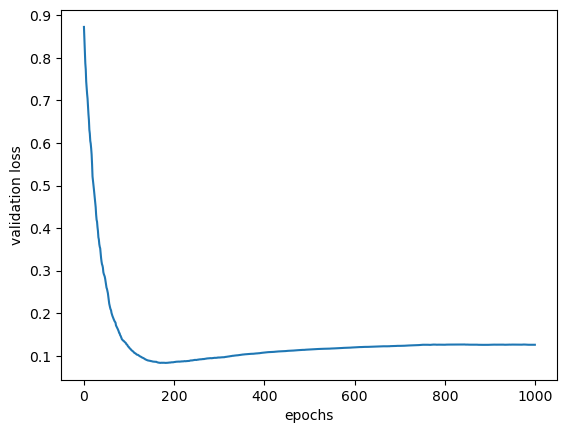

In [14]:
plot([val_loss for (val_loss, _) in models_at_epoch]);
xlabel("epochs");
ylabel("validation loss");

In [15]:
(_, w_early_stopping) = minimum(models_at_epoch);

training error: 0.082
test error: 0.281000

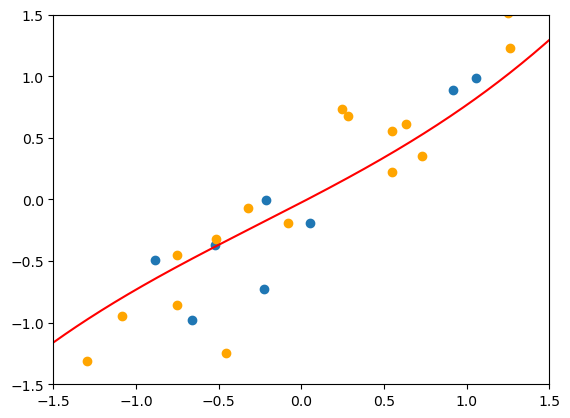

In [16]:
xplot = collect(-1.5:0.01:1.5);
fplot = hcat([xplot.^k / factorial(k) for k = 0:10]...)

plot(xplot, fplot * w_early_stopping; color="red");
scatter(x, y);
scatter(test_x, test_y; color="orange");

xlim([-1.5, 1.5]);
ylim([-1.5, 1.5]);

training_error = round(mean((y - f * w_early_stopping).^2); digits=3)
println("training error: $(training_error)")

test_f = hcat([test_x.^k / factorial(k) for k = 0:10]...)

test_error = round(mean((test_y - test_f * w_early_stopping).^2); digits=3)
@printf("test error: %f", test_error)